In [149]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
img1 = cv2.imread('./test_images/sharapova1.jpg')

In [151]:
img1.shape

(555, 700, 3)

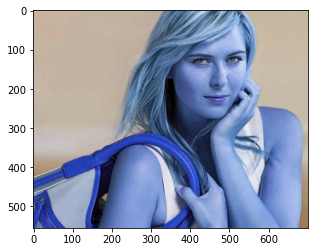

In [152]:
plt.imshow(img1)

In [153]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

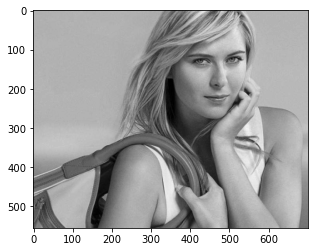

In [154]:
plt.imshow(gray, cmap = 'gray')

In [155]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [156]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

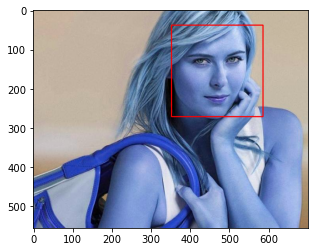

In [157]:
face_img = cv2.rectangle(img1, (x,y), (x+w, y+h),(255,0,0),2)
plt.imshow(face_img)

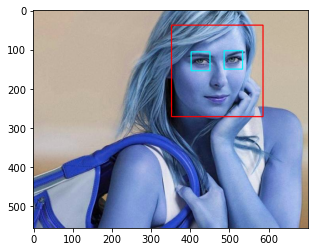

In [158]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,245,252),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

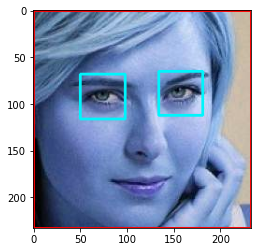

In [159]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [160]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

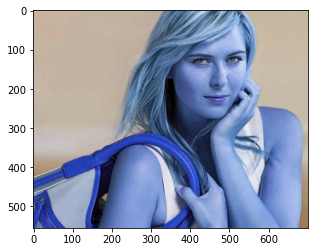

In [161]:
orignal_img = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(orignal_img)

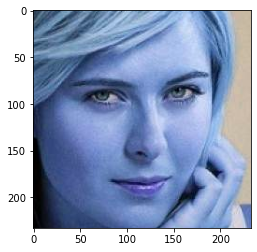

In [162]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

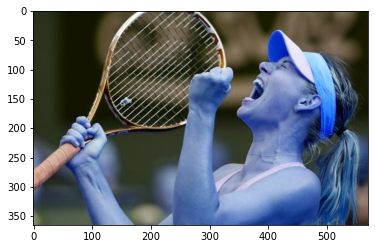

In [163]:
org_img = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_img)

In [164]:
cropped_image_if_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_if_2_eyes

In [165]:
path_to_data = "./dataset"
path_to_crp_data = "./dataset/cropped"

In [166]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [167]:
img_dirs

['./dataset\\lionel_messi',
 './dataset\\maria_sharapova',
 './dataset\\roger_federer',
 './dataset\\serena_williams',
 './dataset\\virat_kohli']

In [168]:
# Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [169]:
import shutil
if os.path.exists(path_to_crp_data):
     shutil.rmtree(path_to_crp_data)
os.mkdir(path_to_crp_data)

In [170]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crp_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/croppeddataset\lionel_messi
Generating cropped images in folder:  ./dataset/croppeddataset\maria_sharapova
Generating cropped images in folder:  ./dataset/croppeddataset\roger_federer
Generating cropped images in folder:  ./dataset/croppeddataset\serena_williams
Generating cropped images in folder:  ./dataset/croppeddataset\virat_kohli
